In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay, roc_curve, roc_auc_score
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler, OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_extraction import DictVectorizer
from imblearn.over_sampling import SMOTE

In [2]:
data = pd.read_csv('data.csv', delimiter=';')
data

,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,15,1,9254,1,1,160.0,1,1,3,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,9070,1,1,122.0,1,37,37,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,17,2,9773,1,1,122.0,1,38,37,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,39,1,8014,0,1,100.0,1,37,38,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4419,1,1,6,9773,1,1,125.0,1,1,1,...,0,6,8,5,12.666667,0,15.5,2.8,-4.06,Graduate
4420,1,1,2,9773,1,1,120.0,105,1,1,...,0,6,6,2,11.000000,0,11.1,0.6,2.02,Dropout
4421,1,1,1,9500,1,1,154.0,1,37,37,...,0,8,9,1,13.500000,0,13.9,-0.3,0.79,Dropout
4422,1,1,1,9147,1,1,180.0,1,37,37,...,0,5,6,5,12.000000,0,9.4,-0.8,-3.12,Graduate


In [3]:
data.columns

Index(['Marital status', 'Application mode', 'Application order', 'Course',
       'Daytime/evening attendance\t', 'Previous qualification',
       'Previous qualification (grade)', 'Nacionality',
       'Mother's qualification', 'Father's qualification',
       'Mother's occupation', 'Father's occupation', 'Admission grade',
       'Displaced', 'Educational special needs', 'Debtor',
       'Tuition fees up to date', 'Gender', 'Scholarship holder',
       'Age at enrollment', 'International',
       'Curricular units 1st sem (credited)',
       'Curricular units 1st sem (enrolled)',
       'Curricular units 1st sem (evaluations)',
       'Curricular units 1st sem (approved)',
       'Curricular units 1st sem (grade)',
       'Curricular units 1st sem (without evaluations)',
       'Curricular units 2nd sem (credited)',
       'Curricular units 2nd sem (enrolled)',
       'Curricular units 2nd sem (evaluations)',
       'Curricular units 2nd sem (approved)',
       'Curricular units 2nd

In [4]:
data.Target.value_counts()

Target
Graduate    2209
Dropout     1421
Enrolled     794
Name: count, dtype: int64

In [5]:
label_encoder = LabelEncoder()

# Updating the Target column to treat enrolled and graduate as the same category (what I am thinking of as the 'good' state)
# Dropout is the bad state
data['Target'] = data['Target'].map({'Enrolled': 1, 'Graduate': 1, 'Dropout': 0})

# List of categorical columns
categorical_cols = [
    'Marital status',
    'Application mode',
    'Course',
    'Daytime/evening attendance\t',
    'Previous qualification',
    'Nacionality',
    'Mother\'s qualification',
    'Father\'s qualification',
    'Mother\'s occupation',
    'Father\'s occupation',
    'Displaced',
    'Educational special needs',
    'Debtor',
    'Tuition fees up to date',
    'Gender',
    'Scholarship holder',
    'International'
]

# Perform one-hot encoding on the categorical columns
data_encoded = pd.get_dummies(data, columns=categorical_cols, drop_first=True)

# Separate features and target variable
X = data_encoded.drop('Target', axis=1)
y = data_encoded['Target']

# Apply SMOTE to the data
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

In [6]:
np.mean(y_resampled)

0.5

In [7]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=1)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Logistic Regression

In [8]:
# Logistic Regression model
log_reg = LogisticRegression(max_iter=1000, random_state=1)
log_reg.fit(X_train_scaled, y_train)

LogisticRegression(max_iter=1000, random_state=1)

In [9]:
y_pred = log_reg.predict(X_test_scaled)

In [10]:
# Evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

In [11]:
print(f'Accuracy: {accuracy:.2f}')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')

Accuracy: 0.90
Precision: 0.86
Recall: 0.95


<Figure size 800x600 with 0 Axes>

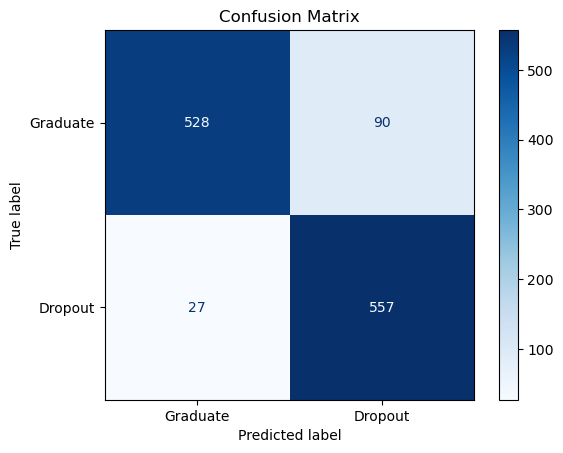

In [12]:
# Confusion matrix
plt.figure(figsize=(8, 6))
ConfusionMatrixDisplay.from_estimator(log_reg, X_test_scaled, y_test, cmap='Blues', display_labels=['Graduate', 'Dropout'])
plt.title('Confusion Matrix')
plt.show()

In [13]:
# Get the probability scores for the testing set
y_scores = log_reg.predict_proba(X_test_scaled)[:, 1]

In [14]:
# Calculate the ROC curve points
fpr, tpr, thresholds = roc_curve(y_test, y_scores)

In [15]:
# Calculate the AUC score
auc_score = roc_auc_score(y_test, y_scores)

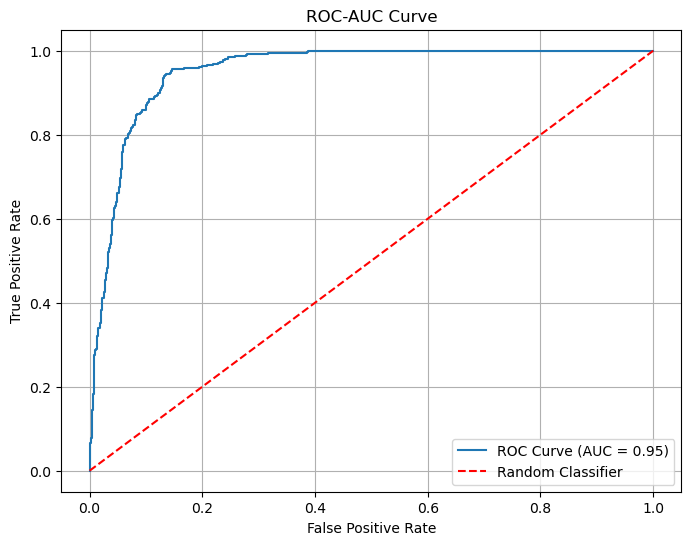

In [16]:
# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {auc_score:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--', color='red', label='Random Classifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-AUC Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

# Decision Tree Classifier

In [17]:
# Train the Decision Tree classifier
decision_tree = DecisionTreeClassifier(random_state=1)
decision_tree.fit(X_train_scaled, y_train)

# Make predictions on the testing set
y_pred_tree = decision_tree.predict(X_test_scaled)

# Calculate the evaluation metrics
accuracy_tree = accuracy_score(y_test, y_pred_tree)
precision_tree = precision_score(y_test, y_pred_tree)
recall_tree = recall_score(y_test, y_pred_tree)

# Print the evaluation metrics
print(f'Decision Tree - Accuracy: {accuracy_tree:.2f}')
print(f'Decision Tree - Precision: {precision_tree:.2f}')
print(f'Decision Tree - Recall: {recall_tree:.2f}')

Decision Tree - Accuracy: 0.84
Decision Tree - Precision: 0.83
Decision Tree - Recall: 0.83


<Figure size 800x600 with 0 Axes>

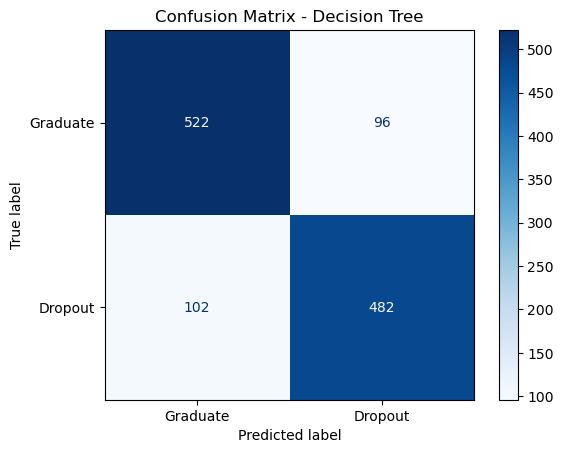

In [18]:
# Plot the confusion matrix using ConfusionMatrixDisplay.from_predictions
plt.figure(figsize=(8, 6))
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_tree, cmap='Blues', display_labels=['Graduate', 'Dropout'])
plt.title('Confusion Matrix - Decision Tree')
plt.show()

In [19]:
# Get the probability scores for the testing set
y_scores_tree = decision_tree.predict_proba(X_test_scaled)[:, 1]

In [20]:
# Calculate the ROC curve points
fpr_tree, tpr_tree, thresholds_tree = roc_curve(y_test, y_scores_tree)

In [21]:
# Calculate the AUC score
auc_score_tree = roc_auc_score(y_test, y_scores_tree)

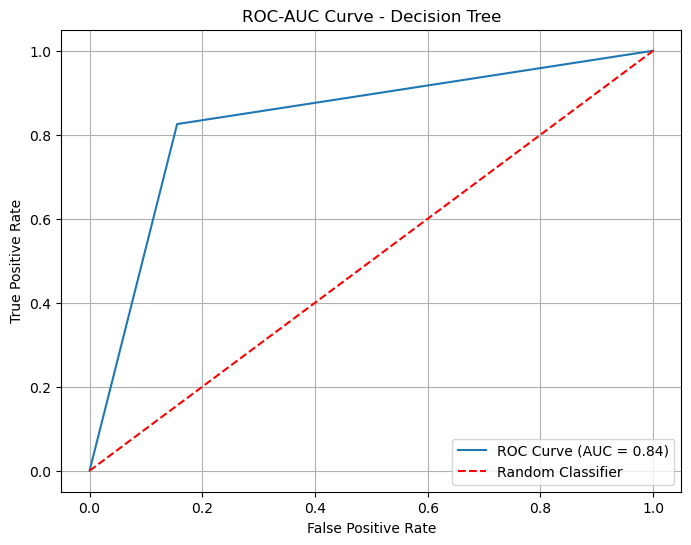

In [22]:
# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr_tree, tpr_tree, label=f'ROC Curve (AUC = {auc_score_tree:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--', color='red', label='Random Classifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-AUC Curve - Decision Tree')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

# Hyperparameter Tuning of the Decision Tree

In [23]:
# Initialize the Decision Tree classifier
decision_tree = DecisionTreeClassifier(random_state=1)

# Define the grid of hyperparameters to search
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize the grid search with 5-fold cross-validation
grid_search = GridSearchCV(estimator=decision_tree, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2, scoring='accuracy')

# Fit the grid search to the data
grid_search.fit(X_train_scaled, y_train)

# Get the best hyperparameters and best performing Decision Tree model
best_params = grid_search.best_params_
best_decision_tree = grid_search.best_estimator_

Fitting 5 folds for each of 108 candidates, totalling 540 fits


In [24]:
y_pred_opt_tree = best_decision_tree.predict(X_test_scaled)

In [25]:
accuracy_opt_tree = accuracy_score(y_test, y_pred_opt_tree)
precision_opt_tree = precision_score(y_test, y_pred_opt_tree)
recall_opt_tree = recall_score(y_test, y_pred_opt_tree)

print(f'Optimized Decision Tree - Accuracy: {accuracy_opt_tree:.2f}')
print(f'Optimized Decision Tree - Precision: {precision_opt_tree:.2f}')
print(f'Optimized Decision Tree - Recall: {recall_opt_tree:.2f}')

Optimized Decision Tree - Accuracy: 0.86
Optimized Decision Tree - Precision: 0.83
Optimized Decision Tree - Recall: 0.88


<Figure size 800x600 with 0 Axes>

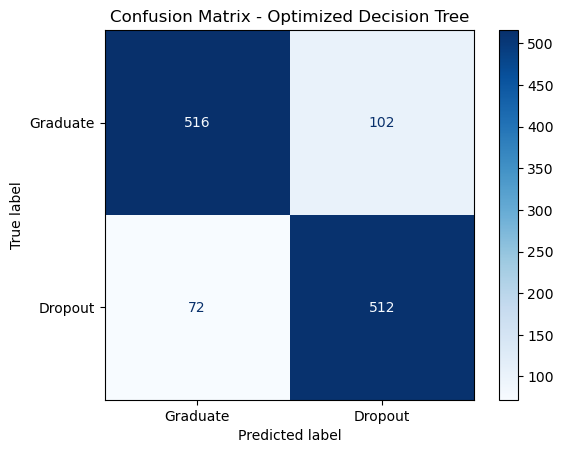

In [26]:
# Confusion matrix
plt.figure(figsize=(8, 6))
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_opt_tree, cmap='Blues', display_labels=['Graduate', 'Dropout'])
plt.title('Confusion Matrix - Optimized Decision Tree')
plt.show()

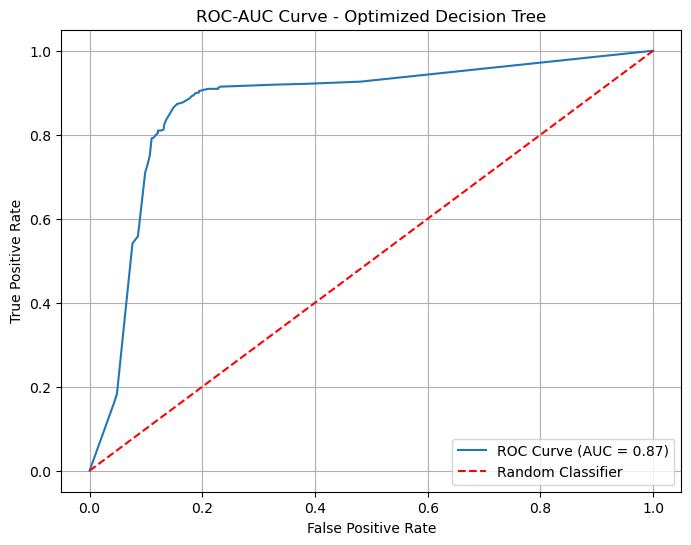

In [27]:
# Get the probability scores for the testing set
y_scores_opt_tree = best_decision_tree.predict_proba(X_test_scaled)[:, 1]

# Calculate the ROC curve points
fpr_opt_tree, tpr_opt_tree, thresholds_opt_tree = roc_curve(y_test, y_scores_opt_tree)

# Calculate the AUC score
auc_score_opt_tree = roc_auc_score(y_test, y_scores_opt_tree)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr_opt_tree, tpr_opt_tree, label=f'ROC Curve (AUC = {auc_score_opt_tree:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--', color='red', label='Random Classifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-AUC Curve - Optimized Decision Tree')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

# Random Forest Classifier

Random Forest is an ensemble learning method that constructs a multitude of decision trees at training time and outputs the class that is the mode of the classes from individual trees for classification, or mean prediction of the individual trees for regression. Each decision tree in the forest is built on a random subset of the training data and considers a random subset of features for each split, providing a built-in form of regularization which helps mitigate the overfitting issue common in single decision trees.

In [28]:
random_forest = RandomForestClassifier(random_state=42)

random_forest.fit(X_train_scaled, y_train)

y_pred_rf = random_forest.predict(X_test_scaled)

accuracy_rf = accuracy_score(y_test, y_pred_rf)
precision_rf = precision_score(y_test, y_pred_rf)
recall_rf = recall_score(y_test, y_pred_rf)

print(f'Random Forest - Accuracy: {accuracy_rf:.2f}')
print(f'Random Forest - Precision: {precision_rf:.2f}')
print(f'Random Forest - Recall: {recall_rf:.2f}')

Random Forest - Accuracy: 0.91
Random Forest - Precision: 0.89
Random Forest - Recall: 0.93


# Hyperparameter Tuning the Random Forest

In [29]:
# Define the grid of hyperparameters to search
param_grid_rf = {
    'n_estimators': [10, 50, 100, 200],
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize the grid search with 5-fold cross-validation
grid_search_rf = GridSearchCV(estimator=random_forest, param_grid=param_grid_rf, cv=5, n_jobs=-1, verbose=2, scoring='accuracy')

grid_search_rf.fit(X_train_scaled, y_train)

# Get the best hyperparameters
best_params_rf = grid_search_rf.best_params_

# Get the best performing Random Forest model
best_random_forest = grid_search_rf.best_estimator_

# Now you can evaluate the optimized Random Forest model on the testing data
y_pred_opt_rf = best_random_forest.predict(X_test_scaled)
accuracy_opt_rf = accuracy_score(y_test, y_pred_opt_rf)
precision_opt_rf = precision_score(y_test, y_pred_opt_rf)
recall_opt_rf = recall_score(y_test, y_pred_opt_rf)

# Print the evaluation metrics
print(f'Optimized Random Forest - Accuracy: {accuracy_opt_rf:.2f}')
print(f'Optimized Random Forest - Precision: {precision_opt_rf:.2f}')
print(f'Optimized Random Forest - Recall: {recall_opt_rf:.2f}')


Fitting 5 folds for each of 216 candidates, totalling 1080 fits
Optimized Random Forest - Accuracy: 0.91
Optimized Random Forest - Precision: 0.89
Optimized Random Forest - Recall: 0.93


# Random Forest Plots

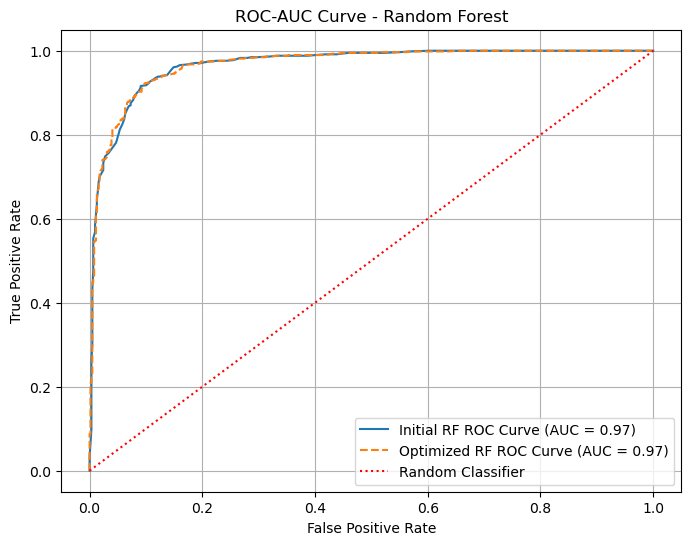

In [30]:
# Get the probability scores for the testing set
y_scores_rf = random_forest.predict_proba(X_test_scaled)[:, 1]
y_scores_opt_rf = best_random_forest.predict_proba(X_test_scaled)[:, 1]

# ROC curve points
fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_test, y_scores_rf)
fpr_opt_rf, tpr_opt_rf, thresholds_opt_rf = roc_curve(y_test, y_scores_opt_rf)

# AUC score
auc_score_rf = roc_auc_score(y_test, y_scores_rf)
auc_score_opt_rf = roc_auc_score(y_test, y_scores_opt_rf)

# Ploting ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr_rf, tpr_rf, label=f'Initial RF ROC Curve (AUC = {auc_score_rf:.2f})')
plt.plot(fpr_opt_rf, tpr_opt_rf, label=f'Optimized RF ROC Curve (AUC = {auc_score_opt_rf:.2f})', linestyle='--')
plt.plot([0, 1], [0, 1], linestyle=':', color='red', label='Random Classifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-AUC Curve - Random Forest')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()


<Figure size 800x600 with 0 Axes>

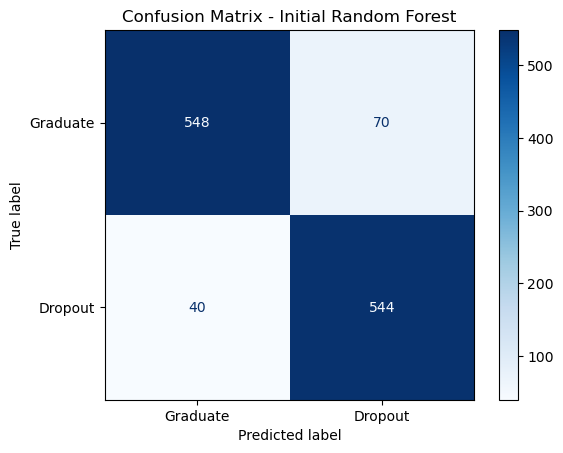

<Figure size 800x600 with 0 Axes>

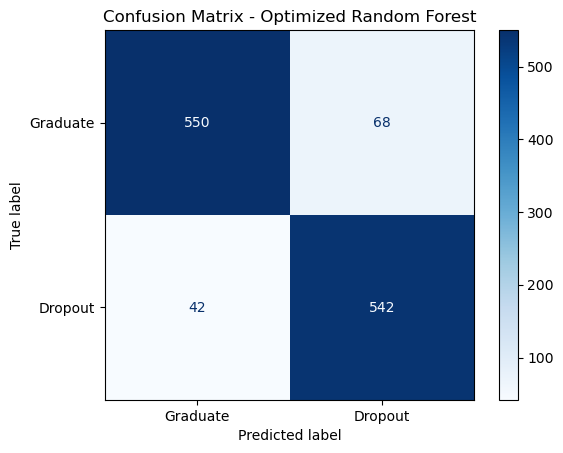

In [31]:
# Predictions
y_pred_rf = random_forest.predict(X_test_scaled)
y_pred_opt_rf = best_random_forest.predict(X_test_scaled)

# Generate confusion matrices
cm_rf = confusion_matrix(y_test, y_pred_rf)
cm_opt_rf = confusion_matrix(y_test, y_pred_opt_rf)

# Plot confusion matrix for initial Random Forest
plt.figure(figsize=(8, 6))
ConfusionMatrixDisplay(cm_rf, display_labels=["Graduate", "Dropout"]).plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix - Initial Random Forest')
plt.show()

# Plot confusion matrix for optimized Random Forest
plt.figure(figsize=(8, 6))
ConfusionMatrixDisplay(cm_opt_rf, display_labels=["Graduate", "Dropout"]).plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix - Optimized Random Forest')
plt.show()


# Feature Importances

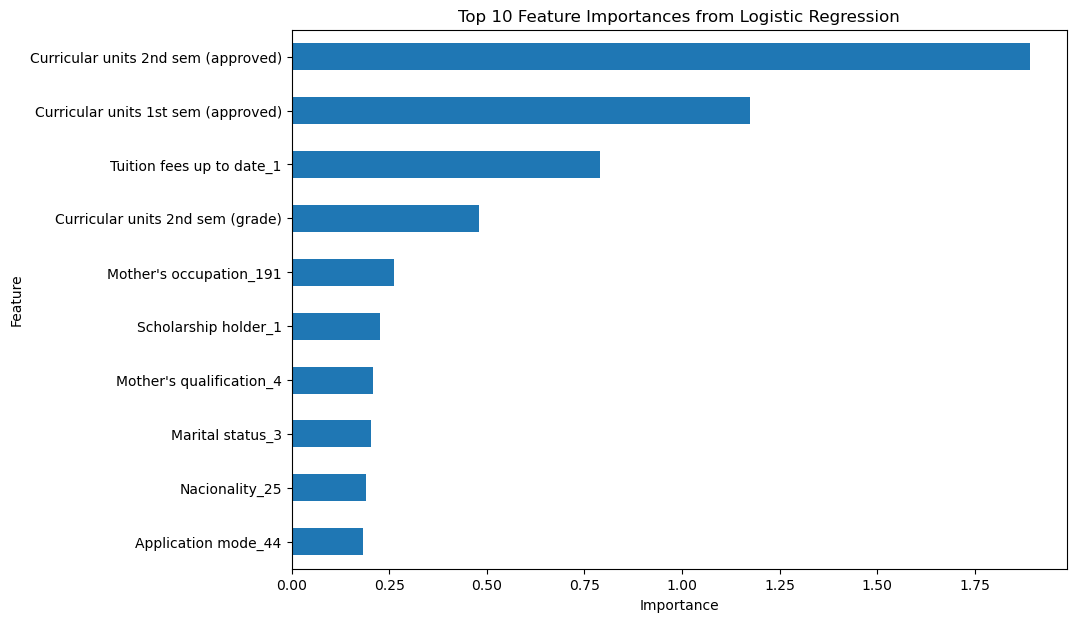

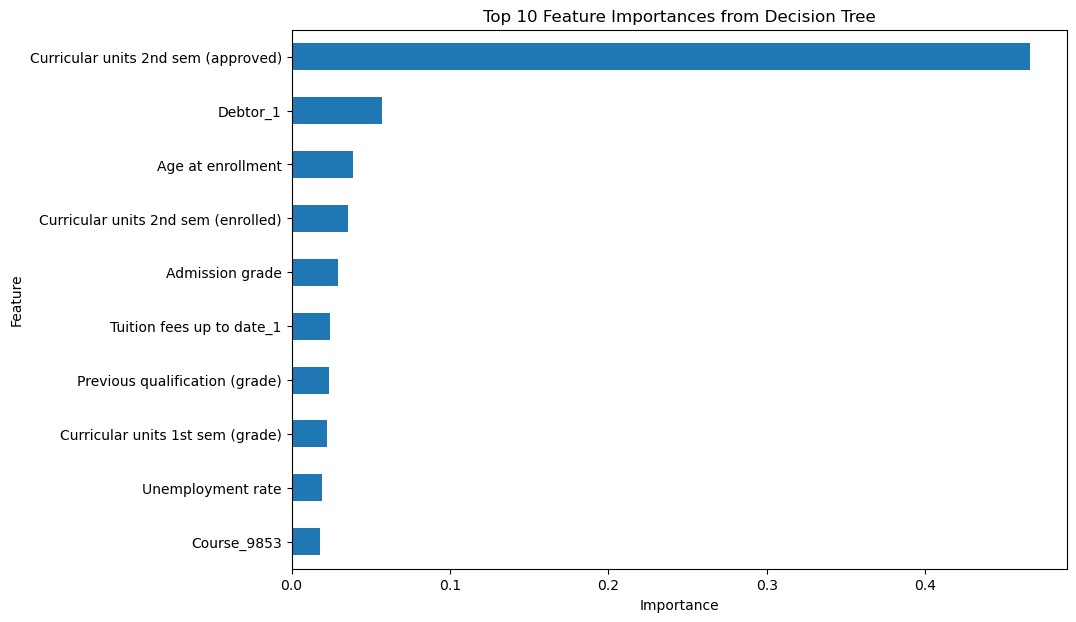

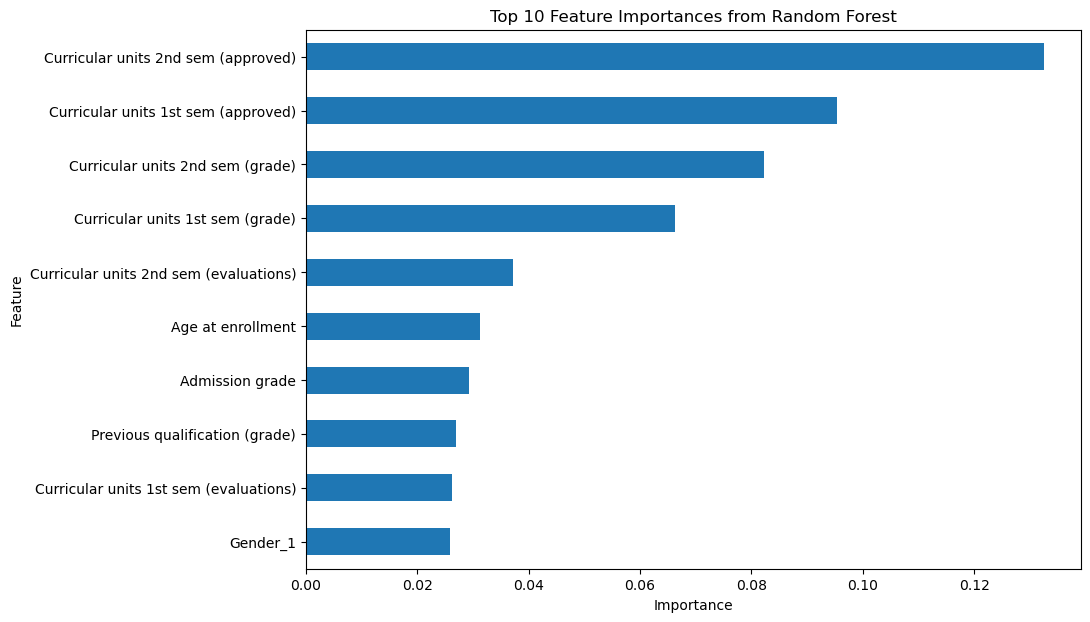

In [32]:
importances_lr = log_reg.coef_[0]
importances_dt = best_decision_tree.feature_importances_
importances_rf = best_random_forest.feature_importances_

# Create a DataFrame for the importances
features = X_train.columns
importances_df = pd.DataFrame({
    'Feature': features,
    'Importance_LR': importances_lr,
    'Importance_DT': importances_dt,
    'Importance_RF': importances_rf,
})
importances_df.set_index('Feature', inplace=True)

# Plot the top 10 feature importances from each model
for model, label in zip(['Importance_LR', 'Importance_DT', 'Importance_RF'], ['Logistic Regression', 'Decision Tree', 'Random Forest']):
    top_10 = importances_df[model].sort_values().tail(10)
    top_10.plot(kind='barh', figsize=(10, 7))
    plt.title(f'Top 10 Feature Importances from {label}')
    plt.xlabel('Importance')
    plt.ylabel('Feature')
    plt.show()

# Recommendations

In [33]:
Dropouts = data[data['Target']== 0]

(array([813., 243., 112., 183.,  19.,  26.,  15.,   7.,   1.,   2.]),
 array([ 0. ,  1.6,  3.2,  4.8,  6.4,  8. ,  9.6, 11.2, 12.8, 14.4, 16. ]),
 <BarContainer object of 10 artists>)

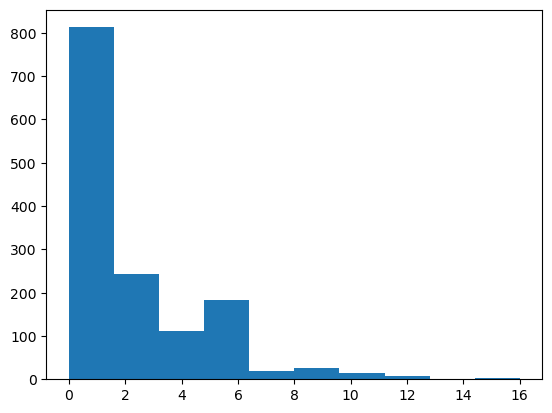

In [34]:
plt.hist(Dropouts['Curricular units 2nd sem (approved)'])

In [35]:
Enrolled = data[data['Target']== 1]

(array([ 171.,  240.,  909., 1213.,  331.,   71.,   47.,    6.,    8.,
           7.]),
 array([ 0.,  2.,  4.,  6.,  8., 10., 12., 14., 16., 18., 20.]),
 <BarContainer object of 10 artists>)

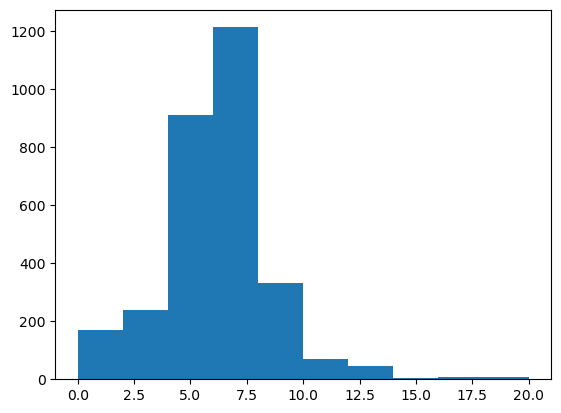

In [36]:
plt.hist(Enrolled['Curricular units 2nd sem (approved)'])

# Evaluation

After exploring different models including Logistic Regression, Decision Tree, and Random Forest to predict student dropout, the Tuned Random Forest model performed the best on the test set. This is not too surprising considering that a random forest is an ensemble of decision trees. Furthermore, hyperparameter tuning was performed on the Random Forest model to find the optimal parameters that yield the best predictive performance. Grid Search was employed to exhaustively search through a specified parameter grid, evaluating all possible parameter combinations to find the optimal values for parameters like n_estimators, max_depth, min_samples_split, and min_samples_leaf. The performance of the model improved post-tuning. Finally, the model's feature importance revealed key features that influence student dropout, providing valuable insights that could be leveraged to develop interventions to improve student retention.